In [1]:
import torch
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize

# Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression,  SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('./datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./datasets/sample_submission.csv
./datasets/train.csv
./datasets/test.csv


In [2]:
train_csv = pd.read_csv('./datasets/train.csv')
test_csv = pd.read_csv('./datasets/test.csv')
submission_csv = pd.read_csv('./datasets/sample_submission.csv')

In [3]:
submission_csv.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [3]:
train_csv.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_csv.shape

(8693, 14)

In [15]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [16]:
train_csv.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [22]:
train_csv.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:>

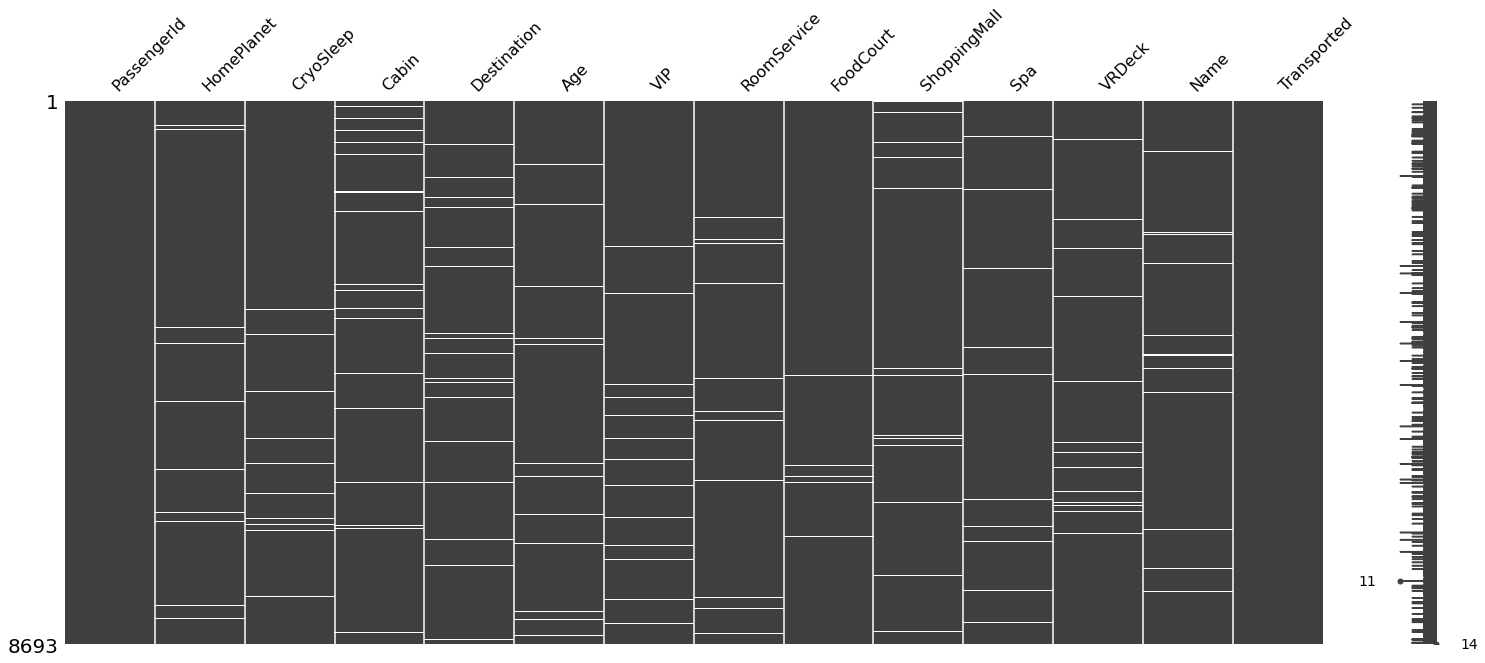

In [17]:
missingno.matrix(train_csv)

In [18]:
test_csv.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [19]:
test_csv.shape

(4277, 13)

In [20]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [23]:
test_csv.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [24]:
test_csv.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


<AxesSubplot:>

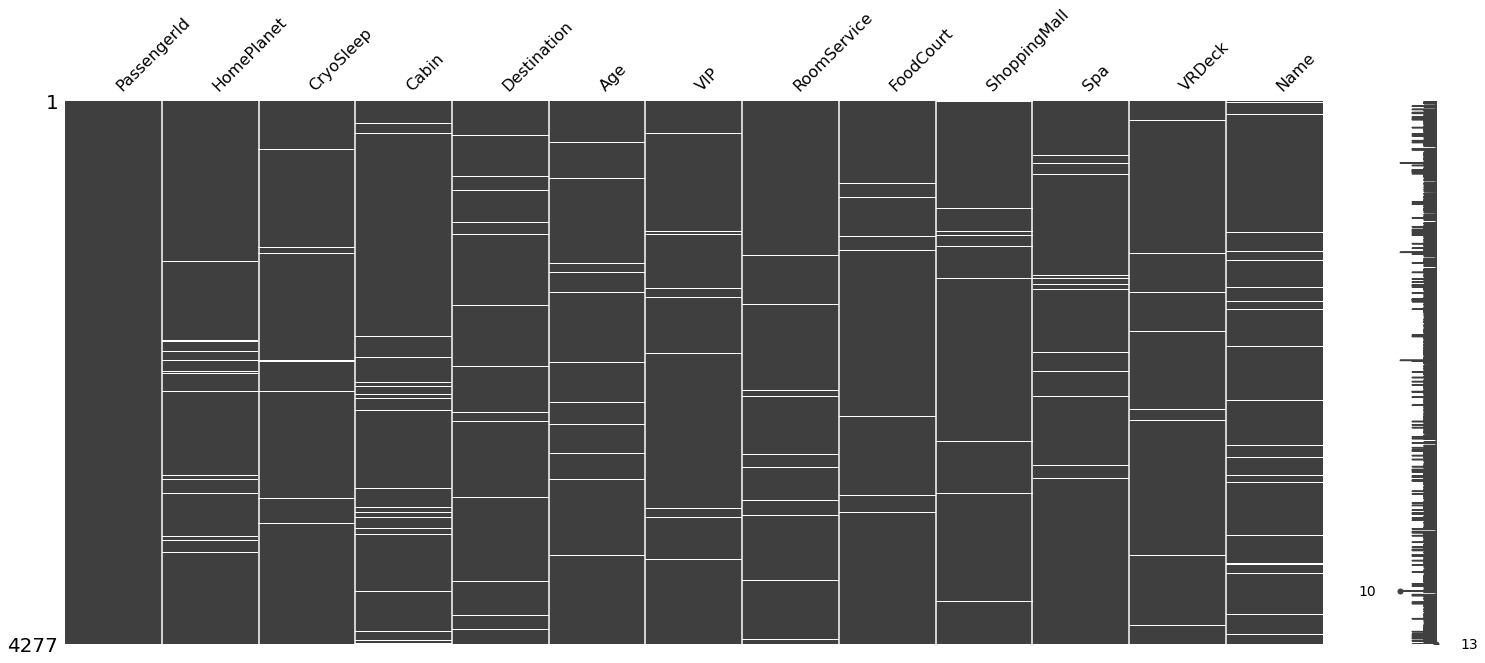

In [25]:
missingno.matrix(test_csv)

In [5]:
def cat_plot(feature):
    fig = plt.figure()
    sns.countplot(x=feature, hue='Transported', data=train_csv)

    plt.xlabel(feature)
    plt.ylabel('Passengers')
    plt.tick_params(axis='both')
    plt.legend(['Not Transported', 'Transported'], loc='upper left')
    plt.title('Transport Count in {}'.format(feature))
    plt.show()

    print(train_csv[feature].value_counts())

In [6]:
def con_plot(feature):
    fig, axs = plt.subplots(ncols=1, nrows=2)
    fig.tight_layout()

    transported = train_csv['Transported'] == True
    
    sns.distplot(train_csv[~transported][feature], label='Not Transported', hist=True, color='#e74c3c', ax=axs[0])
    sns.distplot(train_csv[transported][feature], label='Transported', hist=True, color='#2ecc71', ax=axs[0])
    
    sns.distplot(train_csv[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1])
    sns.distplot(test_csv[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1])

    axs[0].set_xlabel(feature, size=15, labelpad=5)
    axs[1].set_xlabel(feature, size=15, labelpad=5)
    axs[0].set_ylabel('')
    axs[1].set_ylabel('')
    
    axs[0].tick_params(axis='x', labelsize=15)
    axs[1].tick_params(axis='x', labelsize=15)
    axs[0].tick_params(axis='y', labelsize=15)
    axs[1].tick_params(axis='y', labelsize=15)
    
    axs[0].legend(loc='upper right', prop={'size': 14})
    axs[1].legend(loc='upper right', prop={'size': 14})
    
    axs[0].set_title('{} Transported Distribution'.format(feature), size=15)
    axs[1].set_title('{} Distribution'.format(feature), size=15)
    
    plt.show()


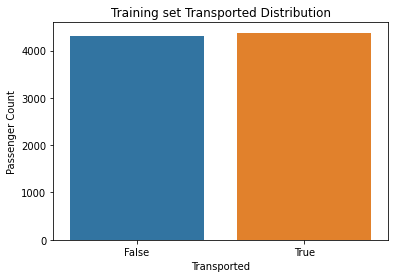

True     4378
False    4315
Name: Transported, dtype: int64


In [7]:
sns.countplot(train_csv['Transported'])
plt.xlabel('Transported')
plt.ylabel('Passenger Count')
plt.title('Training set Transported Distribution')
plt.show()
print(train_csv['Transported'].value_counts())

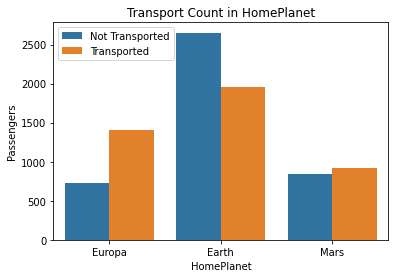

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


In [30]:
cat_plot('HomePlanet')

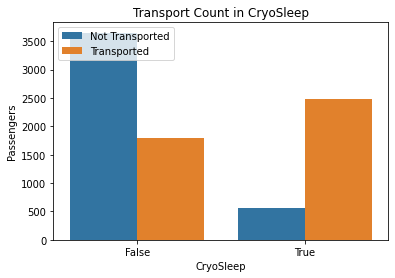

False    5439
True     3037
Name: CryoSleep, dtype: int64


In [32]:
cat_plot('CryoSleep')

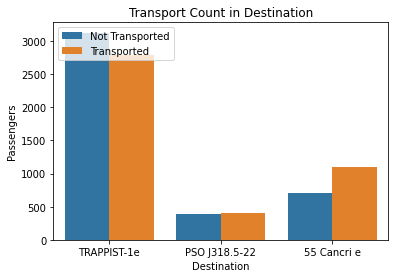

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [34]:
cat_plot('Destination')

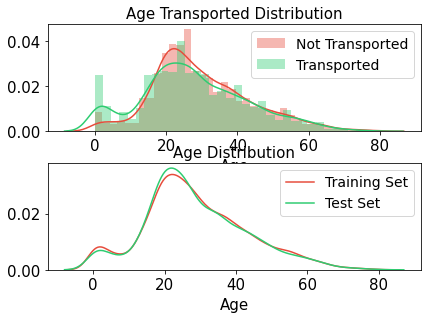

In [35]:
con_plot('Age')

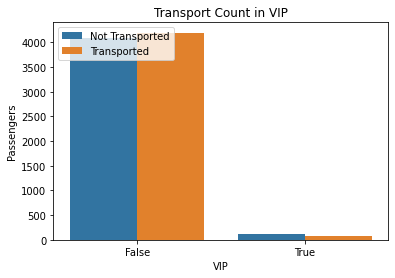

False    8291
True      199
Name: VIP, dtype: int64


In [36]:
cat_plot('VIP')

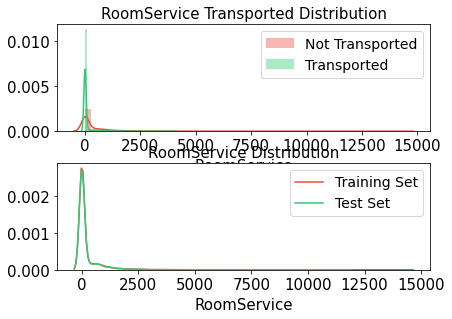

In [37]:
con_plot('RoomService')

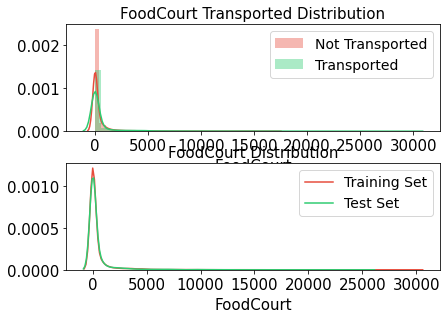

In [38]:
con_plot('FoodCourt')

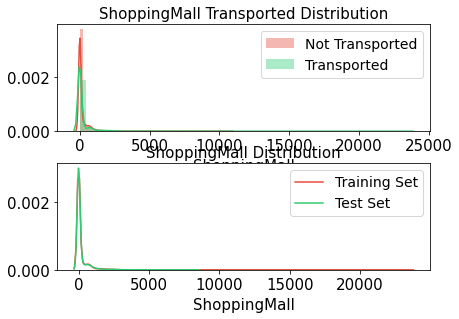

In [39]:
con_plot('ShoppingMall')

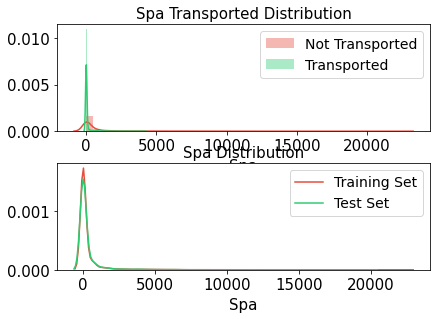

In [40]:
con_plot('Spa')

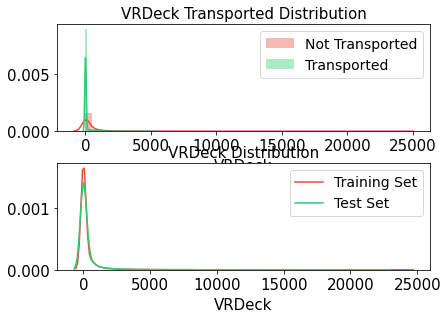

In [41]:
con_plot('VRDeck')

In [8]:
excluded_cols = ['Cabin', 'Name']
train_data = train_csv
test_data = test_csv

In [9]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
def split_PassengerId(df: pd.DataFrame):
    df['PassengerGroup'] = df['PassengerId'].str.split('_', expand=True)[0]
    df['GroupId'] = df['PassengerId'].str.split('_', expand=True)[1]
    
    df.drop('PassengerId', axis=1, inplace=True)
    return df

In [11]:
train_data = split_PassengerId(train_data)
test_data = split_PassengerId(test_data)

In [12]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,GroupId
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


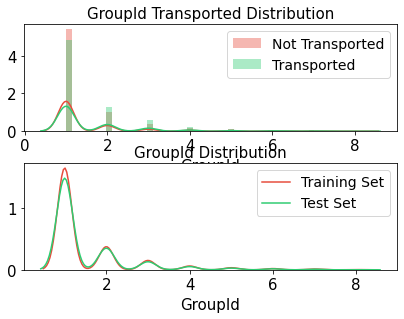

In [15]:
con_plot('GroupId')

In [9]:
def split_Cabin(df: pd.DataFrame):
    df['CabinDeck'] = df['Cabin'].str.split('/', expand=True)[0]
    df['CabinNum'] = df['Cabin'].str.split('/', expand=True)[1]
    df['CabinSide'] = df['Cabin'].str.split('/', expand=True)[2]

    return df.drop('Cabin', axis=1)

In [10]:
train_data = split_Cabin(train_data)
test_data = split_Cabin(test_data)

In [18]:
train_data = train_data.drop(columns=['GroupMemberNum'], inplace=True)

In [3]:
train_data.head()

NameError: name 'train_data' is not defined

In [20]:
train_data.head()

AttributeError: 'NoneType' object has no attribute 'head'

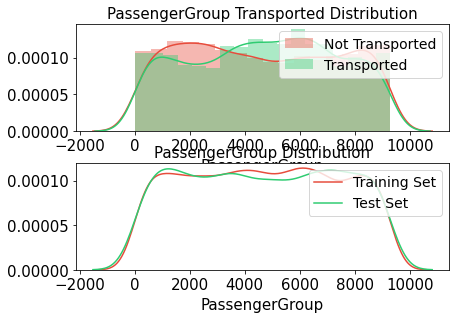

In [15]:
con_plot('PassengerGroup')